<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/20_TSLearn_PAA_and_SAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# PAA and SAX features

This example presents a comparison between PAA [1], SAX [2] and 1d-SAX [3]
features.

PAA (Piecewise Aggregate Approximation) corresponds to a downsampling of the
original time series and, in each segment (segments have fixed size), the mean
value is retained.

SAX (Symbolic Aggregate approXimation) builds upon PAA by quantizing the mean
value. Quantization boundaries are computed for all symbols to be equiprobable,
under a standard normal distribution assumption.

Finally, 1d-SAX is an extension of SAX in which each segment is represented
by an affine function (2 parameters per segment are hence quantized: slope and
mean value).

[1] E. Keogh & M. Pazzani. Scaling up dynamic time warping for datamining
applications. SIGKDD 2000, pp. 285--289.

[2] J. Lin, E. Keogh, L. Wei, et al. Experiencing SAX: a novel symbolic
representation of time series. Data Mining and Knowledge Discovery,
2007. vol. 15(107)

[3] S. Malinowski, T. Guyet, R. Quiniou, R. Tavenard. 1d-SAX: a Novel
Symbolic Representation for Time Series. IDA 2013.


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 4.3 MB/s 


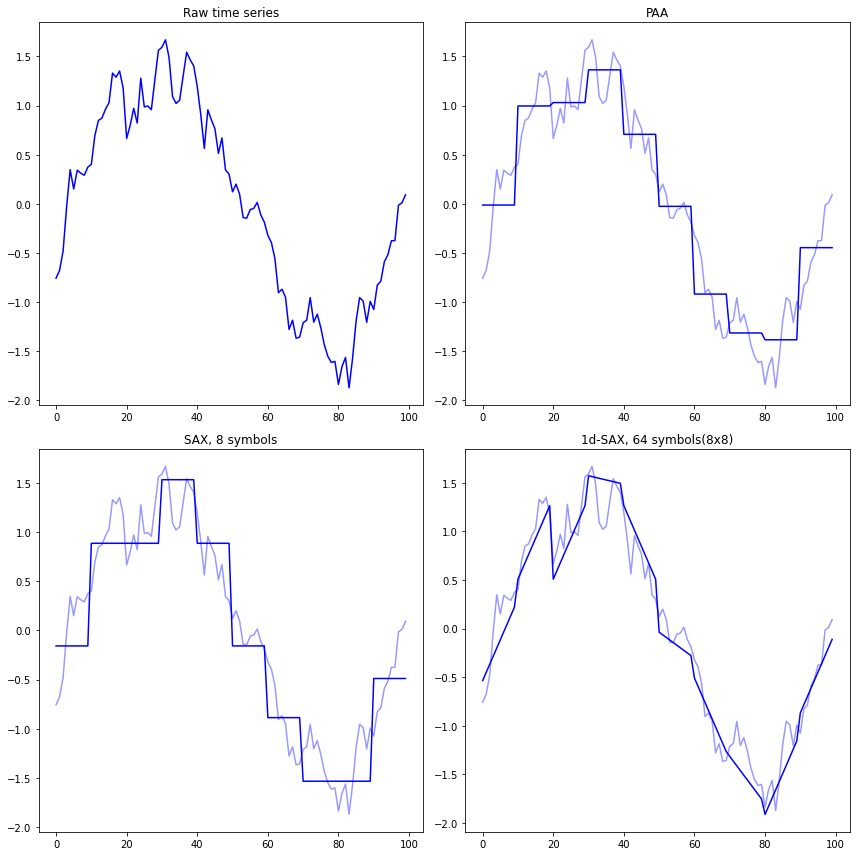

In [6]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, \
    OneD_SymbolicAggregateApproximation

numpy.random.seed(0)
# Generate a random walk time series
n_ts, sz, d = 1, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset = scaler.fit_transform(dataset)

# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 8
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)
transformed_data = one_d_sax.fit_transform(dataset)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(transformed_data)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(dataset[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()